# **NUMERICAL MODELING**

The creation of models to describe the behavior of data.

## STATISTICS

## Beysian Statistics

Deals with probabily of outcomes and proposed hypothesis instead of observed differences.

## FALLACIES

## Simpson's Paradox

Simpson's paradox describes a numerical modeling phenomenon in which the data appears to have an opposite trend when the correct grouping is not taken into account.

### An Example

Let's say that we are flight test engineers working on a new aircraft. We would like to review the flight test data to learn how the climb performance of the aircraft changes with temperature. It is common aerospace knowledge that the climb performance decreases with increasing temperature. We would like to learn how much the performance decreases with increasing temperature.

We gather the flight test data for every six months worth of testing which began in June and ended in December. There was one test a week during that time period.

The following data has been contrived for this example but represents realistic data.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [2]:
weeks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25]
temperature = np.array([97.6, 97.3, 89.2, 89.4, 80.3, 96.8, 92.4, 83.4, 82.4, 70.0, 75.1, 72.5, 70.0, 65.8, 74.2, 56.7, 61.8, 62.0, 54.5, 54.0, 60.5, 47.2, 39.3, 47.1, 45.3])
climb = np.array([509.3, 510.4, 543.1, 542.3, 578.6, 412.5, 430.0, 466.3, 470.0, 519.8, 399.4, 409.7, 419.6, 436.6, 403.1, 373.1, 352.4, 351.6, 381.8, 383.6, 257.6, 310.9, 342.7, 311.4, 318.7])

Now we will do a linear regression between| temperatures and climb

In [3]:
x = temperature.reshape((25,1))
y = climb
regression = LinearRegression().fit(x,y)

We expect that the slope parameter of this regression will be negative. This would mean that as temperature increased, the climb performance would decrease.

In [4]:
print 'Slope Estimate = ' + str(regression.coef_[0])
print 'R2 Value = ' + str(regression.score(x,y))

Slope Estimate = 3.5682541122273177
R2 Value = 0.5667533917951053


We can see, that the regression predicted that the climb performance actually increases with increasing temperature. And while the R2 value isn't great, it's also not ignorable.
Let's take a look at this data with a plot.

In [5]:
linear_fit = regression.predict(x)

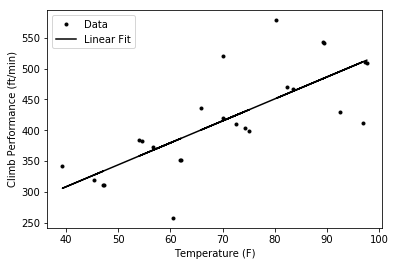

In [6]:
plt.plot(x,y,'k.')
plt.plot(x,linear_fit,'k-')
plt.ylabel('Climb Performance (ft/min)')
plt.xlabel('Temperature (F)')
plt.legend(['Data', 'Linear Fit'])
plt.show()

This plot clearly shows that over the available data the climb performance did generally increase as temperatures increased.

What was unknown to us, however, is that during the flight tests the payload of the aircraft was increased every few weeks. Now that we know this let's plot this data again, but grouped by aircraft gross weight.

In [7]:
payload = np.asarray([0., 0., 0., 0., 0., 100., 100., 100., 100., 100., 200., 200., 200., 200., 200., 300., 300., 300., 300., 300., 400., 400., 400., 400., 400.])

From the new data we can see that the payload changed every 5 weeks

This can be accounted for with a multiple linear regression.

In [8]:
x = np.concatenate((temperature.reshape((25,1)),payload.reshape((25,1))),axis=1)
y = climb
regression = LinearRegression().fit(x,y)

Now let's look at the new slope estimates.

In [9]:
print 'Slope Estimate of Temperature = ' + str(regression.coef_[0])
print 'Slope Estimate of Payload = ' + str(regression.coef_[1])
print 'R2 Value = ' + str(regression.score(x,y))

Slope Estimate of Temperature = -4.0084125468606615
Slope Estimate of Payload = -1.00097028129338
R2 Value = 0.9999982959875419


These slope estimates are more reasonable. The climb performance decreases both with temperature and with payload.

Let's plot the estimate for each group to verify these estimates.

In [14]:
linear_fit_1 = regression.predict(x[:5])
linear_fit_2 = regression.predict(x[5:10])
linear_fit_3 = regression.predict(x[10:15])
linear_fit_4 = regression.predict(x[15:20])
linear_fit_5 = regression.predict(x[20:])

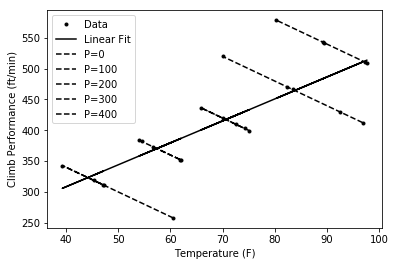

In [16]:
plt.plot(x[:,0],y,'k.')
plt.plot(x[:,0],linear_fit,'k-')
plt.plot(x[:5,0],linear_fit_1,'k--')
plt.plot(x[5:10,0],linear_fit_2,'k--')
plt.plot(x[10:15,0],linear_fit_3,'k--')
plt.plot(x[15:20,0],linear_fit_4,'k--')
plt.plot(x[20:,0],linear_fit_5,'k--')
plt.ylabel('Climb Performance (ft/min)')
plt.xlabel('Temperature (F)')
plt.legend(['Data', 'Linear Fit', 'P=0', 'P=100', 'P=200', 'P=300', 'P=400'])
plt.show()

From this graph it is even more clear that after we account for the payload groups, the temperature increase correlates with a climb performance decrease.

### Application

Simpson's paradox is not something which is usually planned into numerical modeling. It often is unforseen and can lead to misleading conclusions. In the shown example the reverse effect was estimated before accounting for more factors. In practice the error may not be so easy to see, the estimate may just be greater or lesser in magnitude. Either way may lead to false conclusions and poor engineering design. A few things may be done to safeguard against this fallacy. Conclusions of cause-and-effect should not be made where conclusions of correlation are more appropriate. Before even looking at the data, a list of all possible factors which affect the outcome should be generated. In general, good statistical practices should be used.